<a href="https://colab.research.google.com/github/alexandrufalk/Background-generator/blob/Layout-page/01_Neural_Network_Regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

To simplfy regresion-> predincting a number
efinitions for a regression problem (https://en.wikipedia.org/wiki/Regression_analysis)

# Typical architecture of a regresison neural network

 -the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

**Hyperparameter -	Typical value**

Input layer shape -	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s) -	Problem specific, minimum = 1, maximum = unlimited

Neurons per hidden layer -	Problem specific, generally 10 to 100

Output layer shape -	Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation -	Usually ReLU (rectified linear unit)

Output activation -	None, ReLU, logistic/tanh

Loss function -	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

Optimizer -	SGD (stochastic gradient descent), Adam

Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron


🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

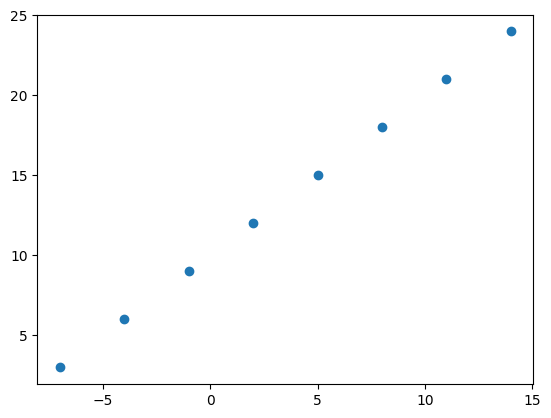

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:

#  look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

In [3]:
# Turn numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2/Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [4]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error. Computes the mean of absolute difference between labels and predictions.
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descendent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 927ms/step - loss: 9.4364 - mae: 9.4364
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 9.3039 - mae: 9.3039
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 9.1714 - mae: 9.1714
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 9.0389 - mae: 9.0389
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 8.9064 - mae: 8.9064


In [5]:

# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[22.762323]], dtype=float32)

# Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model -will be trained longer
model.fit(tf.expand_dims(X,axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 333ms/step - loss: 10.3447 - mae: 10.3447
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2122 - mae: 10.2122
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0797 - mae: 10.0797
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9472 - mae: 9.9472
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8147 - mae: 9.8147
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6822 - mae: 9.6822
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5497 - mae: 9.5497
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4172 - mae: 9.4172
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2847 - mae: 9.2847
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1522 - mae: 9.1522
Epoch 11/100
1/1 [==============================] - 0s 9ms/step

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[29.818007]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(1)])

#2. Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 432ms/step - loss: 13.2430 - mae: 13.2430
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6615 - mae: 12.6615
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0768 - mae: 12.0768
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4826 - mae: 11.4826
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8797 - mae: 10.8797
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2533 - mae: 10.2533
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6002 - mae: 9.6002
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.9159 - mae: 8.9159
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2010 - mae: 8.2010
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4427 - mae: 7.4427
Epoch 11/100
1/1 [==============================] - 0s 12

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 305ms/step


array([[32.3797]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(1)])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.9037 - mae: 13.9037
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.5567 - mae: 13.5567
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 13.2334 - mae: 13.2334
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 12.9247 - mae: 12.9247
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 12.6267 - mae: 12.6267
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 12.3265 - mae: 12.3265
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 12.0256 - mae: 12.0256
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 11.7241 - mae: 11.7241
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 11.4419 - mae: 11.4419
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 11.2271 - mae: 11.2271
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 255ms/step


array([[30.638838]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),

                           tf.keras.layers.Dense(1)])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3042 - mae: 13.3042
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.2951 - mae: 13.2951
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 13.2859 - mae: 13.2859
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2768 - mae: 13.2768
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 13.2677 - mae: 13.2677
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 13.2585 - mae: 13.2585
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 13.2494 - mae: 13.2494
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 13.2403 - mae: 13.2403
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2311 - mae: 13.2311
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 13.2220 - mae: 13.2220
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 244ms/step


array([[2.8294206]], dtype=float32)

In [ ]:

# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 532ms/step - loss: 11.8629 - mae: 11.8629
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8625 - mae: 11.8625
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8620 - mae: 11.8620
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8616 - mae: 11.8616
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8611 - mae: 11.8611
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8607 - mae: 11.8607
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8602 - mae: 11.8602
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8598 - mae: 11.8598
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8593 - mae: 11.8593
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8589 - mae: 11.8589
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 82ms/step


array([[8.131529]], dtype=float32)

In [13]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(50,activation=None),
                           tf.keras.layers.Dense(1)])

#2 Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

#3 Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 879ms/step - loss: 13.1946 - mae: 13.1946
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.5680 - mae: 12.5680
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9391 - mae: 11.9391
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3054 - mae: 11.3054
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6641 - mae: 10.6641
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0115 - mae: 10.0115
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3434 - mae: 9.3434
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6555 - mae: 8.6555
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9441 - mae: 7.9441
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.2056 - mae: 7.2056
Epoch 11/100
1/1 [==============================] - 0s 1

In [14]:
model.predict([17])

1/1 [==============================] - 0s 100ms/step


array([[26.728458]], dtype=float32)

# Evaluating a model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset

X=np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [18]:
# create labels

y=X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Visualizing the data

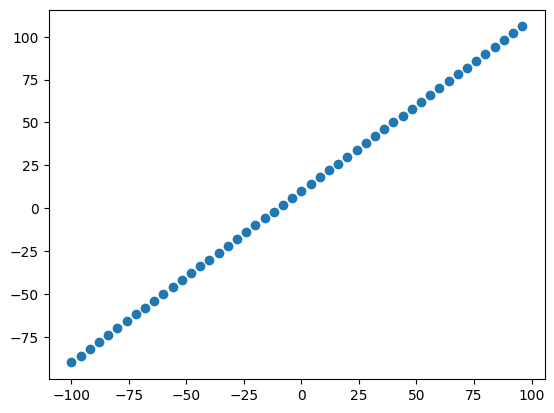

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

# Split data into training/test set

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).




In [22]:
# Spliting the data
X_train=X[:40]
y_train=y[:40]

X_test=y[40:]
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualising the training and test data

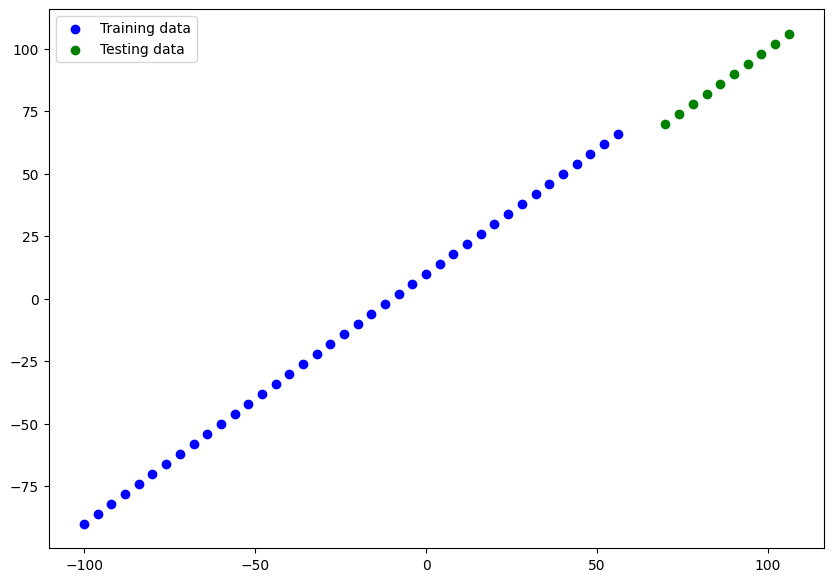

In [25]:
plt.figure(figsize=(10,7))
#Plot taining data
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend()



In [29]:
# Build a model

#Set random seed
tf.random.set_seed(42)

#Create a model

model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#fit the model
#model.fit(X_train,y_train,epochs=100) # commented out on purpose

In [30]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

the cell above errors because we haven't fit or built our modeland also haven't told it what input shape it should be expecting.

In [37]:
#Create a model with input_shape

#Set random seed
tf.random.set_seed(42)

#Create the model

model=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=[1])]) #Define the input shape

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [38]:
#Model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters -** these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [34]:
#Fit the model to the training data
model.fit(X_train,y_train,epochs=100, verbose=0)

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:

enter image description here